<a href="https://colab.research.google.com/github/hairulysin/Support-Vector-Machines/blob/main/SVM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [ ]:
# Load fashion MNIST dataset
from keras.datasets import fashion_mnist
#splitting the dataset into training and testing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

4422102/4422102 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:

print("Train_LABLES : ",y_train)


Train_LABLES :  [9 0 0 ... 3 0 5]


In [ ]:
print("TEST_LABLES : ",y_test)


TEST_LABLES :  [9 2 1 ... 8 1 5]


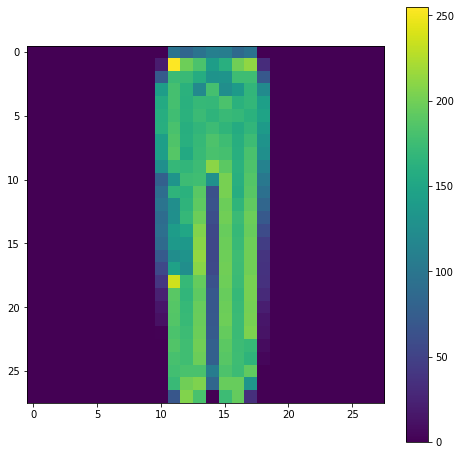

Image (#1000): Which is label number '1', or label 'Trouser''


In [ ]:
#giving class names to the images in data
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sample = 1000 
each = x_train[sample]

plt.figure(figsize=(8,8))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample]]))



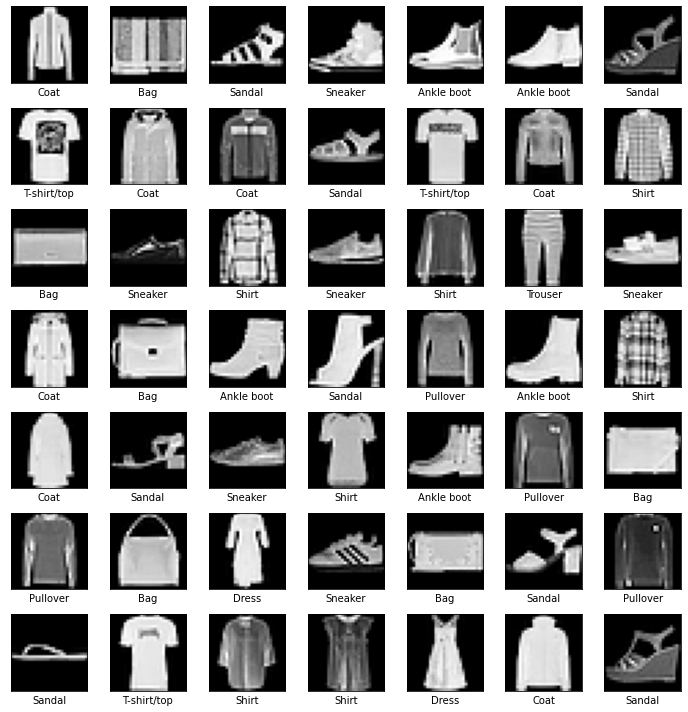

In [ ]:
#Sample images
ROW = 7
COLUMN = 7
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    temp = random.randint(0, len(x_train)+1)
    image = x_train[temp] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[y_train[temp]])
    plt.tight_layout()   
    
plt.show()

In [ ]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:

#let's reshape the data so that we can train our machine..
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [ ]:
#caaling the library for training
# 7 menit eksekusi
from sklearn.svm import SVC

svc = SVC(C=1, kernel='linear', gamma="auto")
#fitting the data into machine
svc.fit(x_train, y_train)


NameError: ignored

In [ ]:
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

-----------------SVM Report---------------
F1 score: 0.845599053028593
Accuracy score: 0.8463
Confusion matrix: 
 [[815   2  13  45   4   1 108   0  12   0]
 [  6 962   2  22   3   0   4   0   1   0]
 [ 22   6 769   8 109   0  79   0   7   0]
 [ 54  15  19 842  27   0  40   0   3   0]
 [  1   2 114  33 773   0  72   0   5   0]
 [  1   0   0   1   0 936   0  38   3  21]
 [174   2 122  30  93   0 562   0  17   0]
 [  0   0   0   0   0  38   0 934   1  27]
 [ 12   1   8   8   2  15  25   4 925   0]
 [  0   0   0   0   0  15   1  39   0 945]]
Plotting confusion matrix


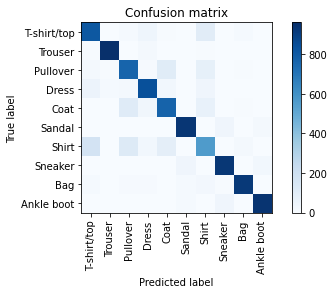

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.77      0.75      1000
           3       0.85      0.84      0.85      1000
           4       0.76      0.77      0.77      1000
           5       0.93      0.94      0.93      1000
           6       0.63      0.56      0.59      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.93      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# SVM report and analysis
y_pred_svc = svc.predict(x_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

In [ ]:

#printing the predicted values
y_pred_svc



array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [ ]:
y_pred_svc[6]

4

In [ ]:
x_test = x_test.reshape(10000,28,28)

In [ ]:
def plot_image(i, predicted_value, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_value == true_label:
        color = 'blue'
    else:
        color = 'red'
    print("Predicted: ",predicted_value,"|||"+" Actual: ",true_label)
    plt.xlabel("Predicted: {} || Actual: {}".format(labelNames[predicted_value],
                                labelNames[true_label]),
                                color=color)

Predicted:  9 ||| Actual:  9


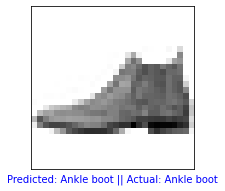

In [ ]:

i = 0

plt.figure(figsize=(6,3))
plot_image(i, y_predy__svc[i], y_test, x_test)
plt.show()
